# 1. Voting Classifier
#### In this assignment, you are expected to build an ensemble of different models and train it on cover type dataset.

## 1.1. Load dataset
#### You will need to read the data from the file (cover.csv). It contains 581012 samples and 54 attributes for each sample. The target column is Cover_Type.

In [2]:
import pandas as pd

In [5]:
cover_data = pd.read_csv("cover.csv")

In [6]:
cover_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [7]:
cover_data.shape

(581012, 55)

In [8]:
cover_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

## 1.2. Prepare dataset
#### Split the data into train, validation, and test sets using train_test_split twice with 0.2 test_size. Your final distribution will be 371847-92962-116203.

In [7]:
from sklearn.model_selection import train_test_split

In [10]:
X = cover_data.drop(columns=['Cover_Type'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 54 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

In [11]:
y = cover_data['Cover_Type']
y.shape

(581012,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(464809, 54)

In [14]:
X_test.shape

(116203, 54)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [16]:
X_train.shape

(371847, 54)

In [17]:
X_val.shape

(92962, 54)

## 1.3. Modeling
#### Train 4-5 different classifiers on the data. You can train RandomForestClassifier, ExtraTreesClassifier, LinearSVC, SGDClassifier, MLPClassifier, etc. Evaluate their performances using validation set. Note that training may take quite a while (up to 30 minutes) depending on the hardware.

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [19]:
results = {} # to be able to track results for each model

_RandomForestClassifier_

In [20]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
rf_clf_acc = rf_clf.score(X_val, y_val)
rf_clf_acc

0.9500010757083539

In [22]:
results["rf_val"] = rf_clf_acc

_ExtraTreesClassifier_

In [23]:
et_clf = ExtraTreesClassifier(random_state=42)
et_clf.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [24]:
et_clf_acc = et_clf.score(X_val, y_val)
et_clf_acc

0.9494524644478389

In [25]:
results["et_val"] = et_clf_acc

_HistGradientBoostingClassifier_

In [26]:
hgb_clf = HistGradientBoostingClassifier(random_state=42)
hgb_clf.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=42)

In [27]:
hgb_clf_acc = hgb_clf.score(X_val, y_val)
hgb_clf_acc

0.8230244616079688

In [28]:
results["hgb_val"] = hgb_clf_acc

_SGDClassifier_

In [29]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [30]:
sgd_clf_acc = sgd_clf.score(X_val, y_val)
sgd_clf_acc

0.6171769109958908

In [31]:
results["sgd_val"] = sgd_clf_acc

_MLPClassifier_

In [32]:
mlp_clf = MLPClassifier(random_state=42)
mlp_clf.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [33]:
mlp_clf_acc = mlp_clf.score(X_val, y_val)
mlp_clf_acc

0.7603752070738581

In [34]:
results["mlp_val"] = mlp_clf_acc

## 1.4. Ensembling
#### Create a hard and soft voting classifier using the models you have trained. You can use VotingClassifier. Check its performance on the validation set. Do you get better or worse performance than any of the individual classifiers?

In [24]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import numpy as np

_Hard VotingClassifier (with SGDClassifier)_

In [56]:
hard_clf = VotingClassifier(estimators=[
    ('rf', rf_clf),
     ('et', et_clf),
    ('hgb', hgb_clf),
    ('sgd', sgd_clf),
    ('mlp', mlp_clf)])

In [57]:
hard_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('et', ExtraTreesClassifier(random_state=42)),
                             ('hgb',
                              HistGradientBoostingClassifier(random_state=42)),
                             ('sgd', SGDClassifier(random_state=42)),
                             ('mlp', MLPClassifier(random_state=42))])

In [58]:
hard_clf_acc = hard_clf.score(X_val, y_val)
hard_clf_acc

0.8863729265721477

In [59]:
results["hard1_val"] = hard_clf_acc

_Soft VotingClassifier_

Not using SGD, because it is not efficient in terms of max depth. Additionally, passed already trained models to avoid MemoryError.

In [40]:
soft_clf = VotingClassifier(estimators=[
    ('rf', rf_clf),
    ('et', et_clf),
    ('hgb', hgb_clf),
    ('mlp', mlp_clf)], voting='soft')

In [41]:
soft_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('et', ExtraTreesClassifier(random_state=42)),
                             ('hgb',
                              HistGradientBoostingClassifier(random_state=42)),
                             ('mlp', MLPClassifier(random_state=42))],
                 voting='soft')

In [42]:
soft_clf_acc = soft_clf.score(X_val, y_val)
soft_clf_acc

0.9189453755297864

In [43]:
results["soft_val"] = soft_clf_acc

In [60]:
results

{'rf_val': 0.9500010757083539,
 'et_val': 0.9494524644478389,
 'hgb_val': 0.8230244616079688,
 'sgd_val': 0.6171769109958908,
 'mlp_val': 0.7603752070738581,
 'hard1_val': 0.8863729265721477,
 'soft_val': 0.9189453755297864}

Soft VotingClassifier is better than Hard VotingClassifier (maybe because of the hard version has SGDClassifier in it which has the lowest accuracy). However, RandomForestClassifier alone is the best.

#### Check if any of the models hurts the performance of the ensemble. You can access the estimators of the ensemble using estimators_ attribute. If so, drop those using set_params and reevaluate.

In [63]:
from sklearn.base import clone

def optimize_ensemble(voting_clf, baseline_score, X_train, y_train, X_val, y_val):
    contributions = {}
    to_drop = []

    for name in voting_clf.named_estimators_:
        # clone the classifier to avoid modifying the original ensemble
        temp_clf = clone(voting_clf)

        temp_clf.set_params(**{name: 'drop'})
        temp_clf.fit(X_train, y_train)

        reduced_score = temp_clf.score(X_val, y_val)
        contribution = baseline_score - reduced_score
        contributions[name] = contribution

        print(f"\nEvaluating contribution of: {name}")
        print(f"Validation score without {name}: {reduced_score:.4f}")
        print(f"Contribution of {name}: {contribution:.4f}")

        if contribution <= 0:
            print(f"{name} is hurting the ensemble. Marked for removal.")
            to_drop.append(name)
        else:
            print(f"{name} contributes positively to the ensemble.")

    for name in to_drop:
        voting_clf.set_params(**{name: 'drop'})

    print("\nRefitting optimized ensemble...")
    voting_clf.fit(X_train, y_train)
    optimized_score = voting_clf.score(X_val, y_val)
    print(f"Optimized ensemble validation score: {optimized_score:.4f}")

    return voting_clf, contributions

In [64]:
optimized_hard_clf, contributions_hard = optimize_ensemble(
    hard_clf, hard_clf_acc, X_train, y_train, X_val, y_val
)


Evaluating contribution of: rf
Validation score without rf: 0.8199
Contribution of rf: 0.0665
rf contributes positively to the ensemble.

Evaluating contribution of: et
Validation score without et: 0.8206
Contribution of et: 0.0657
et contributes positively to the ensemble.

Evaluating contribution of: hgb
Validation score without hgb: 0.8580
Contribution of hgb: 0.0284
hgb contributes positively to the ensemble.

Evaluating contribution of: sgd
Validation score without sgd: 0.9030
Contribution of sgd: -0.0166
sgd is hurting the ensemble. Marked for removal.

Evaluating contribution of: mlp
Validation score without mlp: 0.8922
Contribution of mlp: -0.0058
mlp is hurting the ensemble. Marked for removal.

Refitting optimized ensemble...
Optimized ensemble validation score: 0.9463


In [65]:
hard_clf.named_estimators_

{'rf': RandomForestClassifier(random_state=42),
 'et': ExtraTreesClassifier(random_state=42),
 'hgb': HistGradientBoostingClassifier(random_state=42),
 'sgd': 'drop',
 'mlp': 'drop'}

In [66]:
print("Hard Voting Contributions:", contributions_hard)

Hard Voting Contributions: {'rf': 0.06652180460833457, 'et': 0.06574729459348982, 'hgb': 0.028398700544308375, 'sgd': -0.016641208235623206, 'mlp': -0.005808825111335847}


In [67]:
optimized_soft_clf, contributions_soft = optimize_ensemble(
    soft_clf, soft_clf_acc, X_train, y_train, X_val, y_val
)


Evaluating contribution of: rf
Validation score without rf: 0.8848
Contribution of rf: 0.0341
rf contributes positively to the ensemble.

Evaluating contribution of: et
Validation score without et: 0.8848
Contribution of et: 0.0342
et contributes positively to the ensemble.

Evaluating contribution of: hgb
Validation score without hgb: 0.9334
Contribution of hgb: -0.0144
hgb is hurting the ensemble. Marked for removal.

Evaluating contribution of: mlp
Validation score without mlp: 0.9370
Contribution of mlp: -0.0180
mlp is hurting the ensemble. Marked for removal.

Refitting optimized ensemble...
Optimized ensemble validation score: 0.9515


In [68]:
print("Soft Voting Contributions:", contributions_soft)

Soft Voting Contributions: {'rf': 0.034142983154407225, 'et': 0.03417525440502578, 'hgb': -0.01443600611002338, 'mlp': -0.018039629095759513}


*Results on test dataset*

In [69]:
rf_clf_acc_test = rf_clf.score(X_test, y_test)
rf_clf_acc_test

0.9503627272961972

In [70]:
results["rf_test"] = rf_clf_acc_test

In [71]:
et_clf_acc_test = et_clf.score(X_test, y_test)
et_clf_acc_test

0.9490976997151537

In [72]:
results["et_test"] = et_clf_acc_test

In [73]:
hgb_clf_acc_test = hgb_clf.score(X_test, y_test)
hgb_clf_acc_test

0.8235587721487397

In [74]:
results["hgb_test"] = hgb_clf_acc_test

In [75]:
sgd_clf_acc_test = sgd_clf.score(X_test, y_test)
sgd_clf_acc_test

0.6160856432277996

In [76]:
results["sgd_test"] = sgd_clf_acc_test

In [77]:
mlp_clf_acc_test = mlp_clf.score(X_test, y_test)
mlp_clf_acc_test

0.7587669853618237

In [78]:
results["mlp_test"] = mlp_clf_acc_test

In [79]:
op_hard_clf_acc_test = optimized_hard_clf.score(X_test, y_test)
op_hard_clf_acc_test

0.9465074051444455

In [80]:
results["hard_test"] = op_hard_clf_acc_test

In [81]:
op_soft_clf_acc_test = optimized_soft_clf.score(X_test, y_test)
op_soft_clf_acc_test

0.9513265578341351

In [82]:
results["soft_test"] = op_soft_clf_acc_test

In [83]:
results

{'rf_val': 0.9500010757083539,
 'et_val': 0.9494524644478389,
 'hgb_val': 0.8230244616079688,
 'sgd_val': 0.6171769109958908,
 'mlp_val': 0.7603752070738581,
 'hard1_val': 0.8863729265721477,
 'soft_val': 0.9189453755297864,
 'rf_test': 0.9503627272961972,
 'et_test': 0.9490976997151537,
 'hgb_test': 0.8235587721487397,
 'sgd_test': 0.6160856432277996,
 'mlp_test': 0.7587669853618237,
 'hard_test': 0.9465074051444455,
 'soft_test': 0.9513265578341351}

Even though dropping SGD and MLP helped with the performance of Hard VotingClassifier, dropping HGB and MLP resulted in the best performance for Soft VotingClassifier

# 2. Random Forest
#### In this assignment, you are expected to build a random forest that classifies a toy dataset.

## 2.1. Load dataset
#### You will need to read the data from the file (data.csv). It contains 15000 samples and two features for each sample.

In [56]:
data = pd.read_csv("data.csv", header=None)

In [57]:
data.shape

(15000, 3)

In [58]:
data.head()

,0,1,2
0,10182.554999,-371.830691,100.0
1,-8493.323486,7009.446179,0.0
2,21322.088204,-390.558362,100.0
3,5473.925002,-1878.223941,0.0
4,-7422.540710,5291.351276,0.0


In [59]:
data.columns = ['column1', 'column2', 'column3']

In [60]:
data['column3'].value_counts()

column3
100.0    7500
0.0      7500
Name: count, dtype: int64

Assuming 'column3' is the target.

## 2.2. Prepare dataset
#### Split the data into train and test sets with 0.2 test size.

In [61]:
X = data.drop(columns=['column3'])
y = data['column3']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_train.shape

(12000, 2)

In [64]:
X_test.shape

(3000, 2)

## 2.3. Modeling
#### Train a DecisionTreeClassifier on the data. Use GridSearchCV to tune the hyperparameters.

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
from scipy.stats import mode

In [66]:
dt_clf = DecisionTreeClassifier(criterion="entropy", random_state=42) # better criterion since dataset size is not much

parameters = {
    "max_depth": [None, 5, 10, 15], # to prevent overfitting
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 3],
    "min_impurity_decrease": [0.0, 0.5]
}

In [67]:
gs_clf = GridSearchCV(dt_clf, parameters, verbose=3)
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2;, score=0.806 total time=   0.0s
[CV 2/5] END max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2;, score=0.805 total time=   0.0s
[CV 3/5] END max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2;, score=0.804 total time=   0.0s
[CV 4/5] END max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2;, score=0.801 total time=   0.0s
[CV 5/5] END max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2;, score=0.807 total time=   0.0s
[CV 1/5] END max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=5;, score=0.805 total time=   0.0s
[CV 2/5] END max_depth=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=5;, score=0.802 total time=   0.0s
[CV 3/5] END max_depth=None, min_im

[CV 2/5] END max_depth=None, min_impurity_decrease=0.5, min_samples_leaf=3, min_samples_split=2;, score=0.500 total time=   0.0s
[CV 3/5] END max_depth=None, min_impurity_decrease=0.5, min_samples_leaf=3, min_samples_split=2;, score=0.500 total time=   0.0s
[CV 4/5] END max_depth=None, min_impurity_decrease=0.5, min_samples_leaf=3, min_samples_split=2;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=None, min_impurity_decrease=0.5, min_samples_leaf=3, min_samples_split=2;, score=0.500 total time=   0.0s
[CV 1/5] END max_depth=None, min_impurity_decrease=0.5, min_samples_leaf=3, min_samples_split=5;, score=0.500 total time=   0.0s
[CV 2/5] END max_depth=None, min_impurity_decrease=0.5, min_samples_leaf=3, min_samples_split=5;, score=0.500 total time=   0.0s
[CV 3/5] END max_depth=None, min_impurity_decrease=0.5, min_samples_leaf=3, min_samples_split=5;, score=0.500 total time=   0.0s
[CV 4/5] END max_depth=None, min_impurity_decrease=0.5, min_samples_leaf=3, min_samples_split=5;,

[CV 4/5] END max_depth=5, min_impurity_decrease=0.5, min_samples_leaf=2, min_samples_split=2;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=5, min_impurity_decrease=0.5, min_samples_leaf=2, min_samples_split=2;, score=0.500 total time=   0.0s
[CV 1/5] END max_depth=5, min_impurity_decrease=0.5, min_samples_leaf=2, min_samples_split=5;, score=0.500 total time=   0.0s
[CV 2/5] END max_depth=5, min_impurity_decrease=0.5, min_samples_leaf=2, min_samples_split=5;, score=0.500 total time=   0.0s
[CV 3/5] END max_depth=5, min_impurity_decrease=0.5, min_samples_leaf=2, min_samples_split=5;, score=0.500 total time=   0.0s
[CV 4/5] END max_depth=5, min_impurity_decrease=0.5, min_samples_leaf=2, min_samples_split=5;, score=0.500 total time=   0.0s
[CV 5/5] END max_depth=5, min_impurity_decrease=0.5, min_samples_leaf=2, min_samples_split=5;, score=0.500 total time=   0.0s
[CV 1/5] END max_depth=5, min_impurity_decrease=0.5, min_samples_leaf=2, min_samples_split=10;, score=0.500 total time

[CV 5/5] END max_depth=10, min_impurity_decrease=0.0, min_samples_leaf=3, min_samples_split=5;, score=0.861 total time=   0.0s
[CV 1/5] END max_depth=10, min_impurity_decrease=0.0, min_samples_leaf=3, min_samples_split=10;, score=0.838 total time=   0.0s
[CV 2/5] END max_depth=10, min_impurity_decrease=0.0, min_samples_leaf=3, min_samples_split=10;, score=0.850 total time=   0.0s
[CV 3/5] END max_depth=10, min_impurity_decrease=0.0, min_samples_leaf=3, min_samples_split=10;, score=0.843 total time=   0.0s
[CV 4/5] END max_depth=10, min_impurity_decrease=0.0, min_samples_leaf=3, min_samples_split=10;, score=0.845 total time=   0.0s
[CV 5/5] END max_depth=10, min_impurity_decrease=0.0, min_samples_leaf=3, min_samples_split=10;, score=0.858 total time=   0.0s
[CV 1/5] END max_depth=10, min_impurity_decrease=0.5, min_samples_leaf=1, min_samples_split=2;, score=0.500 total time=   0.0s
[CV 2/5] END max_depth=10, min_impurity_decrease=0.5, min_samples_leaf=1, min_samples_split=2;, score=0.50

[CV 1/5] END max_depth=15, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2;, score=0.818 total time=   0.0s
[CV 2/5] END max_depth=15, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2;, score=0.820 total time=   0.0s
[CV 3/5] END max_depth=15, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2;, score=0.825 total time=   0.0s
[CV 4/5] END max_depth=15, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2;, score=0.824 total time=   0.0s
[CV 5/5] END max_depth=15, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=2;, score=0.830 total time=   0.0s
[CV 1/5] END max_depth=15, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=5;, score=0.819 total time=   0.0s
[CV 2/5] END max_depth=15, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=5;, score=0.823 total time=   0.0s
[CV 3/5] END max_depth=15, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=5;, score=0.826 tot

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_impurity_decrease': [0.0, 0.5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

#### Train the best model on the whole train set (do you need to?) and evaluate the model on the test set.

In [68]:
best_dt = gs_clf.best_estimator_

In [69]:
gs_clf.best_params_

{'max_depth': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

GridSearchCV is initialized with refit=True (which is the default), so once it finds the best estimator using cross-validation, it retrains it on the whole training set. 

In [70]:
y_pred = best_dt.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.856


#### Generate 1,200 subsets of the training set, each containing 100 randomly chosen instances. You can use ShuffleSplit.

In [71]:
rs = ShuffleSplit(n_splits=1200, train_size=100, random_state=42)

In [72]:
subsets = []

for train_index, _ in rs.split(X_train):
    subsets.append((X_train.iloc[train_index], y_train.iloc[train_index]))

#### Train one tree on each subset, using the best model you previously found. Evaluate the performance of the trees using the test set. Did you get lower or higher accuracy? Why?

In [77]:
trees = []

for X_subset, y_subset in subsets:
    tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=42) # best parameters
    tree.fit(X_subset, y_subset)
    trees.append(tree)

In [78]:
tree_accuracies = [accuracy_score(y_test, tree.predict(X_test)) for tree in trees]
print("Average Tree Accuracy:", sum(tree_accuracies) / len(tree_accuracies))

Average Tree Accuracy: 0.7975280555555557


Average accuracy is lower. Let's look at individual accuracies:

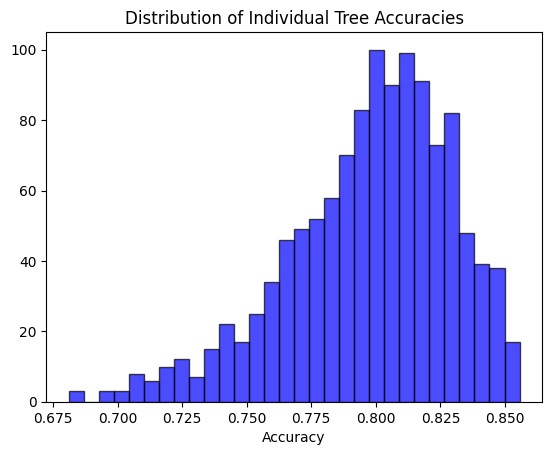

In [79]:
plt.hist(tree_accuracies, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title("Distribution of Individual Tree Accuracies")
plt.xlabel("Accuracy")
plt.show()

Very few of the trees have closer accuracy to the individual best model. It is because of the overfitting and high variance, because we only 100 instances during training for each tree. 

#### For each instance in the test set, predict its class using 1200 trees, and keep only the most frequent prediction. You can use mode from scipy.stats. Evaluate these predictions. Did you get lower or higher accuracy?

In [80]:
all_preds = np.array([tree.predict(X_test) for tree in trees])

In [81]:
final_preds, _ = mode(all_preds, keepdims=False)

In [82]:
final_preds

array([100.,   0.,   0., ..., 100.,   0., 100.])

In [83]:
final_accuracy = accuracy_score(y_test, final_preds)
print("Ensemble Accuracy (Majority Voting):", final_accuracy)

Ensemble Accuracy (Majority Voting): 0.8563333333333333


The accuracy is higher, because the predictions are diverse and the weak models are covered by aggregating all the prediction results and voting.